# NaN Boxing Benchmarks

In [1]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [3]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: IntegerBench, Runs: 100, Runtimes: [12, 4, 3, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 8, 3, 3, 4, 3, 3, 3, 2, 5, 3, 9, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 2, 3, 7, 2, 5, 3, 5, 8, 3, 3, 3, 3, 3, 7, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 4, 2, 3, 4, 4, 3, 3, 5, 3, 4, 4, 3, 3, 3, 2, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


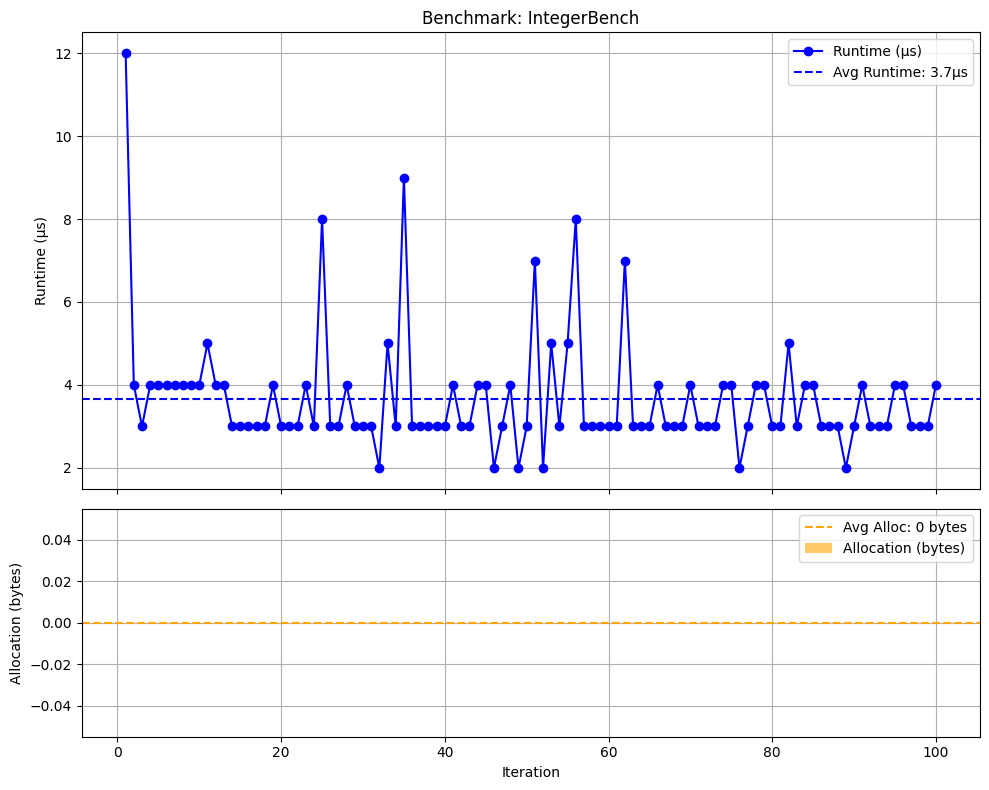

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [85, 59, 76, 73, 83, 73, 46, 61, 56, 89, 59, 74, 70, 57, 56, 75, 72, 71, 47, 51, 55, 80, 76, 74, 51, 64, 86, 70, 84, 48, 69, 66, 67, 77, 86, 97, 74, 60, 71, 64, 85, 74, 75, 78, 60, 76, 56, 83, 45, 102, 84, 54, 70, 77, 69, 46, 48, 71, 60, 81, 82, 105, 79, 56, 57, 96, 56, 57, 74, 79, 52, 79, 42, 56, 82, 72, 58, 75, 49, 64, 67, 88, 133, 76, 93, 67, 84, 67, 70, 61, 120, 54, 79, 77, 90, 77, 69, 46, 73, 73], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


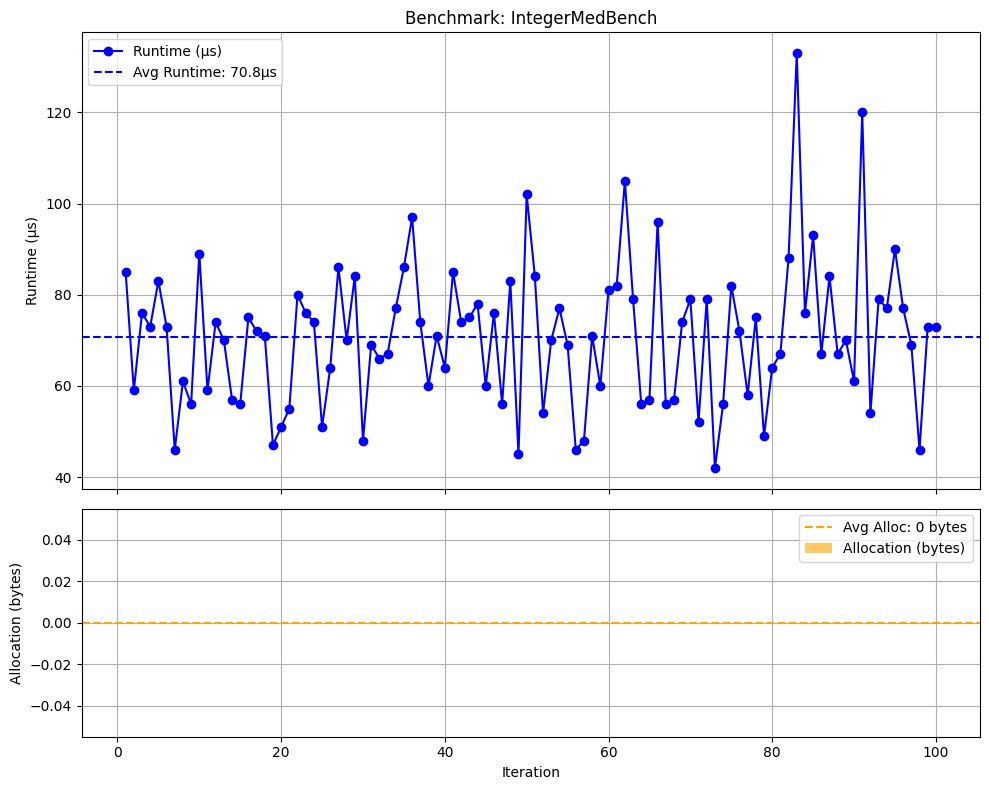

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [69, 68, 69, 73, 70, 74, 75, 68, 68, 69, 68, 68, 73, 78, 69, 69, 69, 67, 67, 72, 78, 85, 67, 75, 143, 71, 69, 84, 109, 71, 67, 72, 67, 75, 72, 74, 69, 67, 72, 67, 67, 77, 74, 67, 71, 70, 71, 71, 71, 68, 71, 73, 87, 72, 71, 69, 88, 67, 79, 71, 66, 67, 66, 74, 83, 67, 120, 72, 69, 69, 71, 75, 81, 68, 69, 106, 90, 83, 68, 67, 68, 72, 75, 69, 74, 68, 71, 73, 67, 70, 70, 80, 106, 67, 67, 72, 68, 67, 72, 72], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


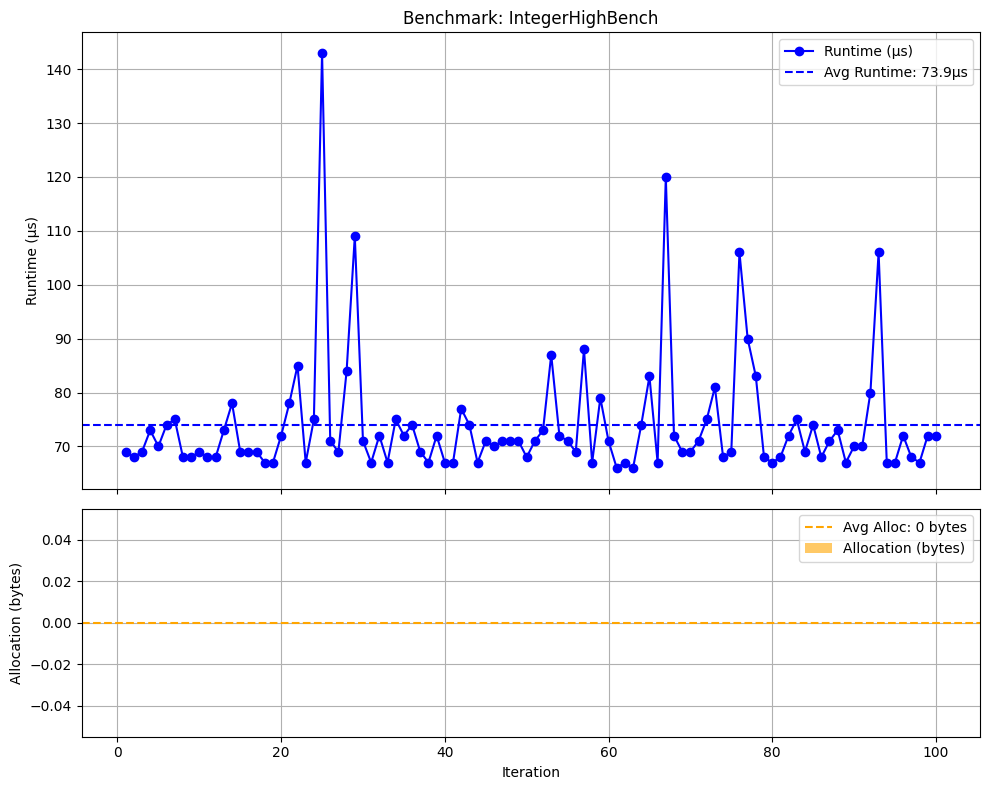

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [271, 206, 221, 202, 228, 212, 228, 197, 196, 214, 210, 194, 172, 215, 218, 234, 195, 194, 207, 204, 199, 168, 182, 191, 218, 215, 235, 202, 185, 202, 202, 220, 188, 196, 188, 213, 188, 196, 263, 217, 214, 205, 182, 272, 185, 206, 268, 214, 212, 211, 221, 229, 264, 200, 169, 240, 231, 245, 166, 243, 233, 172, 183, 200, 254, 210, 198, 264, 222, 239, 231, 207, 207, 194, 211, 204, 223, 211, 194, 205, 227, 207, 168, 206, 197, 218, 209, 179, 242, 199, 212, 171, 199, 220, 183, 163, 214, 236, 224, 204], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


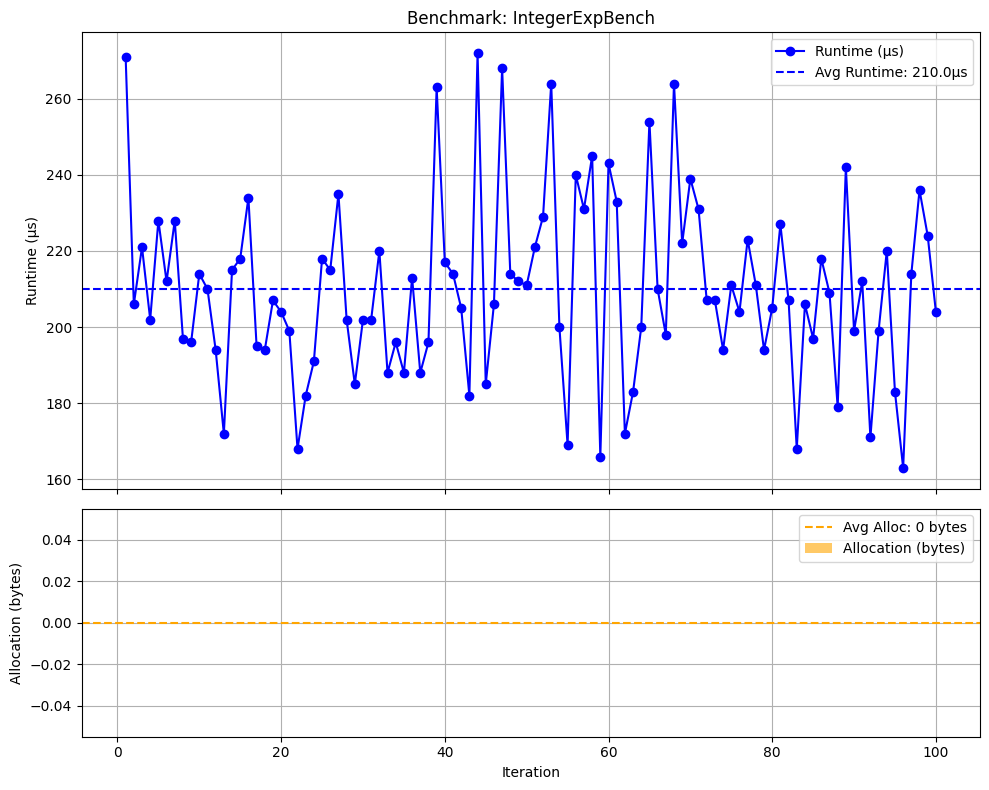

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [1968, 2279, 2072, 1898, 1883, 2072, 1908, 2013, 1997, 2070, 1964, 2017, 1982, 2133, 2180, 2242, 2455, 2592, 2242, 2085, 2014, 2261, 1953, 2091, 2018, 1997, 2007, 2203, 2006, 2011, 1979, 1994, 2111, 2177, 2118, 2000, 2116, 1991, 2045, 1967, 1920, 2057, 2054, 1913, 1861, 1920, 1950, 1879, 1965, 2140, 1997, 1969, 2053, 1940, 1964, 1976, 1920, 2095, 1864, 2104, 1894, 2175, 1987, 1996, 1981, 2109, 1983, 1919, 1994, 1935, 1989, 1915, 2081, 1989, 1925, 2049, 2036, 1945, 2228, 2112, 2027, 2001, 2078, 2032, 1993, 2067, 2174, 2097, 2053, 1935, 1970, 1997, 2089, 1916, 1910, 2036, 1880, 1961, 2154, 2143], Allocations: [331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776,

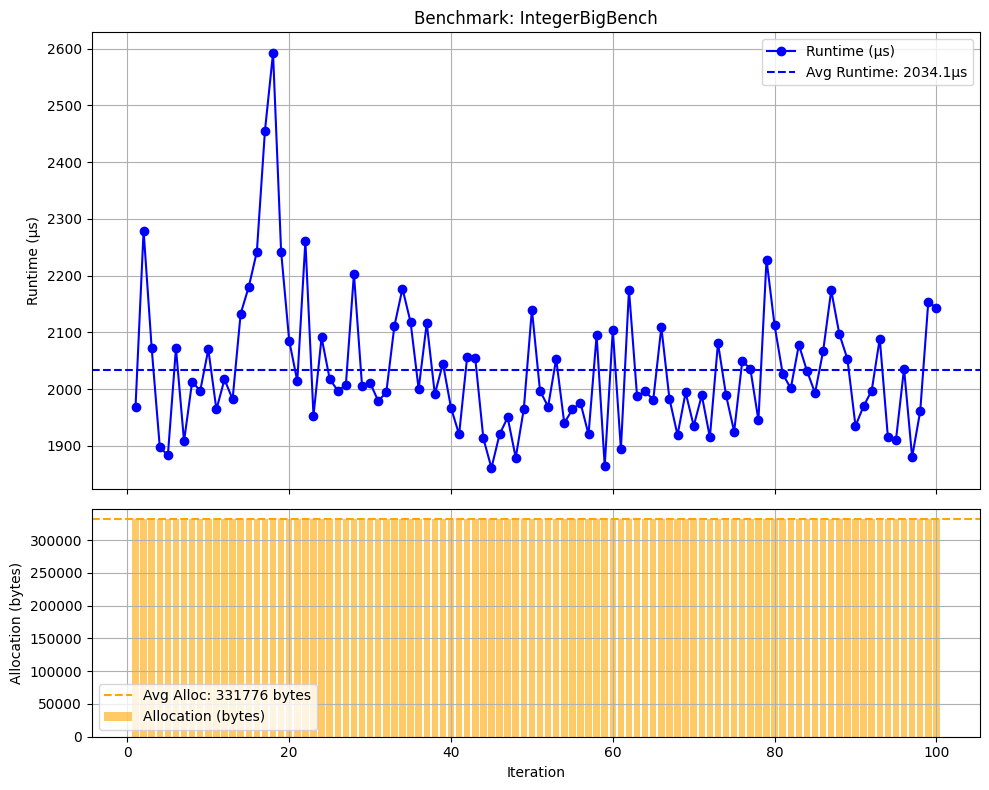

In [4]:
# General Configuration
BENCHMARKS = [
#    "DoubleBench",
#    "DoubleMedBench",
#    "DoubleHighBench",
#    "DoubleSqrtBench",
#    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])